#Models: ML Pipelines

##Models: ML Pipelines

The core of the ML workflow is the phase of writing and executing machine learning algorithms to obtain an ML model. The model engineering pipeline is usually utilized by a data science team and includes a number of operations that lead to a final model. These operations include *Model Training, Model Evaluation, Model Testing, and Model Packaging. We recommend automating these steps as much as possible.*

##Model Training

Model Training – The process of applying the machine learning algorithm on training data to train an ML model. It also includes feature engineering the hyperparameter tuning for the model training activity.



*   Feature engineering might include:



          a) Discretize continuous features
          b) Decompose features (e.g., categorical, date/time, etc.)
          c) Add transformations of features (e.g., log(x), sqrt(x), x2, etc.)
          d) Aggregate features into promising new features
          e) Feature scaling: Standardize or normalize features
          f) New features should be added quickly to get fast from a feature idea to the feature running in production.



*   Model Engineering might be an iterative process and include the following workflow:
        a) Every ML model specification (code that creates an ML model) should go through a code review and be versioned.
        b) Train many ML models from different categories (e.g., linear regression, logistic regression, k-means, naive Bayes, SVM, Random Forest, etc.) using standard parameters.
        c) Measure and compare their performance. For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
        d) Error Analysis: analyze the types of errors the ML models make.
        e) Consider further feature selection and engineering.
        f) Identify the top three to five most promising models, preferring models that make different types of errors.
        g) Hyperparameters tuning by using cross-validation. Please note that data transformation choices are also hyperparameters. Random search for hyperparameters is preferred over grid search.
        h) Consider Ensemble methods such as majority vote, bagging, boosting, or stacking. Combining ML models should produce better performance than running them individually.



##Model Evaluation

Model Evaluation – Validate the trained model to ensure it meets original business objectives before serving the ML model in production to the end-user.

##Model Testing

Model Testing – Once the final ML model is trained, its performance needs to be measured by using the hold-back test dataset to estimate the generalization error by performing the final “Model Acceptance Test”.

##Model Packaging

Model Packaging – The process of exporting the final ML model into a specific format (e.g. PMML, PFA, or ONNX), which describes the model to be consumed by the business application. We cover the ML model packaging in the part ‘ML Model serialization formats’ below.

##Different forms of ML workflows

Operating an ML model might assume several architectural styles. In the following, we discuss four architectural patterns which are classified along two dimensions:



1.   ** ML Model Training** and
2.   **ML Model Prediction**

Please note that for the sake of simplicity, we disregard the third dimension **3. ML Model Type**, which denotes the type of machine learning algorithm such as supervised, unsupervised, semisupervised, and Reinforcement Learning.

There are two ways how we perform **ML Model Training:**
       
       a) Offline learning (aka batch or static learning): The model is trained on a set of already collected data. After deploying to the production environment, the ML model remains constant until it re-trained because the model will see a lot of real-live data and becomes stale. This phenomenon is called ‘model decay’ and should be carefully monitored.
       b) Online learning (aka dynamic learning): The model is regularly being re-trained as new data arrives, e.g. as data streams. This is usually the case for ML systems that use time-series data, such as sensor, or stock trading data to accommodate the temporal effects in the ML model.

The second dimension is ML Model Prediction, which denotes the mechanics of the ML model to makes predictions. Here we also distinguish two modes:

      a) Batch predictions: The deployed ML model makes a set of predictions based on historical input data. This is often sufficient for data that is not time-dependent, or when it is not critical to obtain real-time predictions as output.
      b) Batch predictions: The deployed ML model makes a set of predictions based on historical input data. This is often sufficient for data that is not time-dependent, or when it is not critical to obtain real-time predictions as output.

After identifying these two dimensions, we can classify the operationalization of machine learning models into four ML architecture patterns:

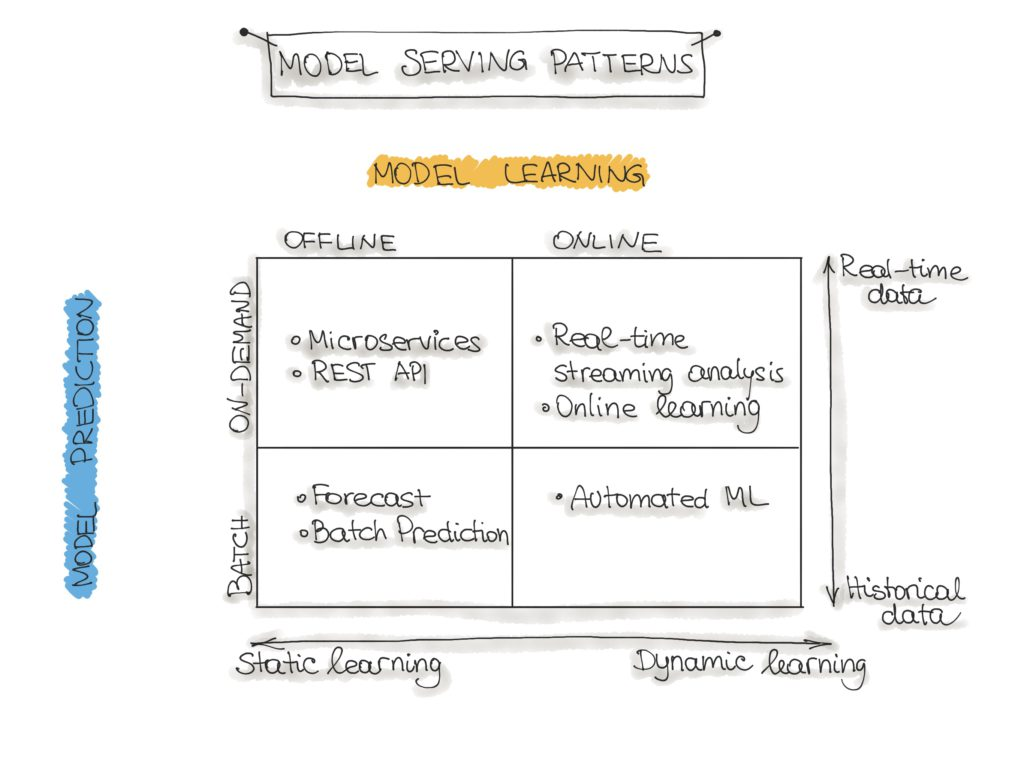

##Forecast

This type of machine learning workflow is widely spread in academic research or data science education (e.g., Kaggle or DataCamp). This form is used to experiment with ML algorithms and data as it is the easiest way to create a machine learning system. Usually, we take an available dataset, train the ML model, then run this model on another (mostly historical) data, and the ML model makes predictions. This way, we output a forecast. This ML workflow is not very useful and, therefore, not common in an industry setting for production systems (e.g. mobile applications).

##Web-Service

The most commonly described deployment architecture for ML models is a web service (microservise). The web service takes input data and outputs a prediction for the input data points. The model is trained offline on historical data, but it uses real-live data to make predictions. The difference from a forecast (batch predictions) is that the ML model runs near real-time and handles a single record at a time instead of processing all the data at once. The web service uses real-time data to make predictions, but the model remains constant until it is re-trained and re-deployed into the production system.

The figure below illustrates the architecture for wrapping trained models as deployable services. Please note, we discuss methods for wrapping trained ML models as deployable services in the Deployment Strategies Section.

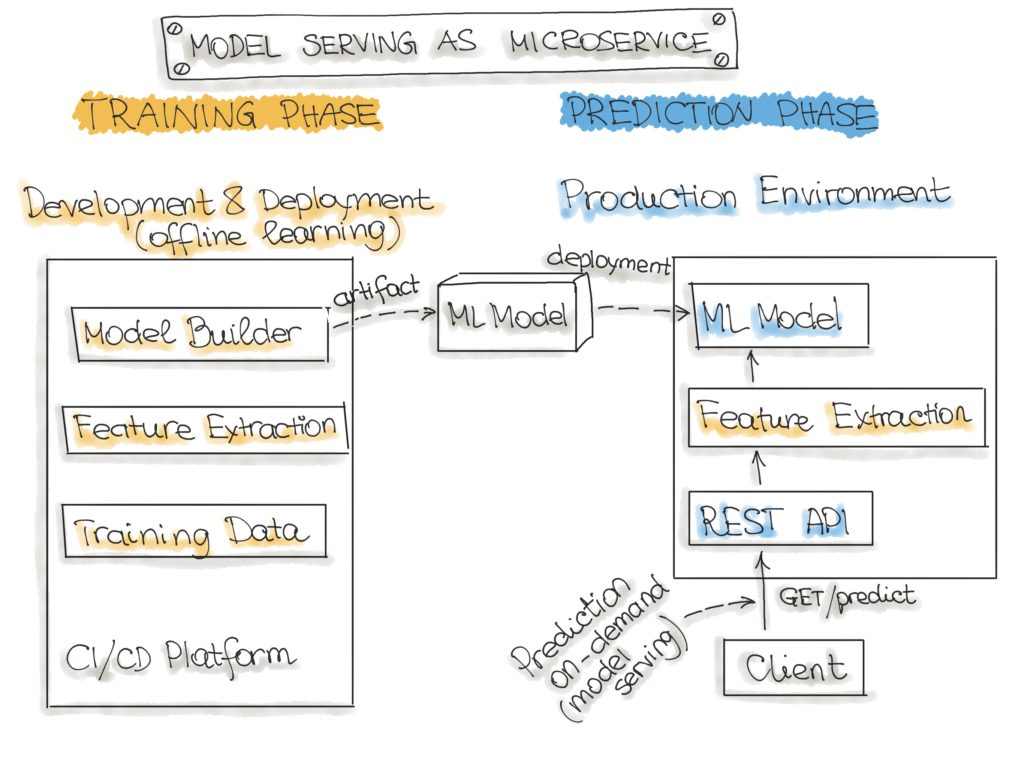

##Online Learning

The most dynamic way to embed machine learning into a production system is to implement online learning, which is also known as real-time streaming analytics. Please note that online learning can be a confusing name because the core learning or ML model training is usually not performed on the live system. We should call it *incremental learning*; however, the term online learning is already established within the ML community.

In this type of ML workflow, the ML learning algorithm is continuously receiving a data stream, either as single data points or in small groups called mini-batches. The system learns about new data on the fly as it arrives, so the ML model is incrementally being re-trained with new data. This continually re-trained model is instantly available as a web service.

Technically, this type of ML system works well with the lambda architecture in big data systems. Usually, the input data is a stream of events, and the ML model takes the data as it enters the system, provides predictions and re-learns on these new data. The model would typically run as a service on a Kubernetes cluster or similar.

A big difficulty with the online learning system in production is that if bad data is entering the system, the ML model, as well as the whole system performance, will increasingly decline.

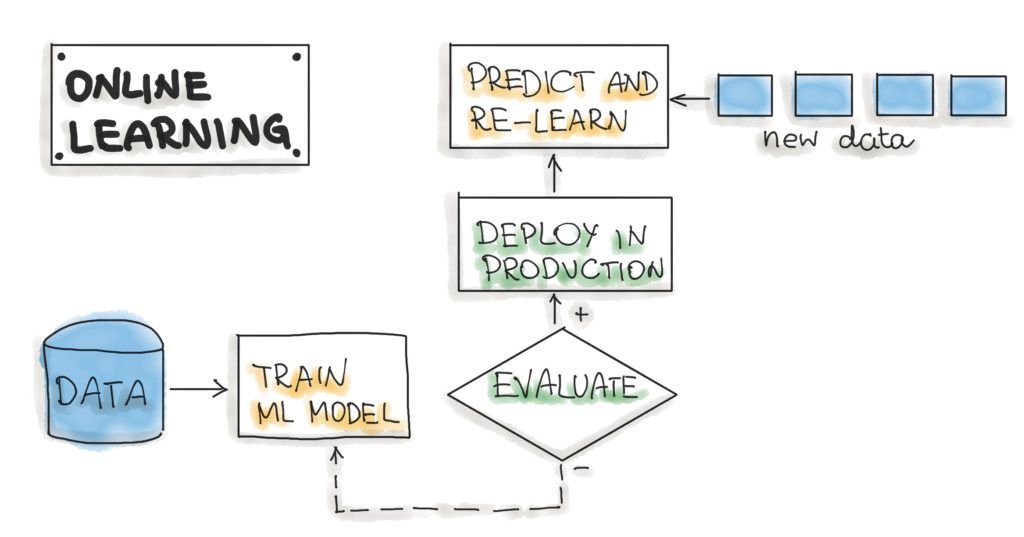

##AutoML

An even more sophisticated version of online learning is automated machine learning or AutoML.

AutoML is getting a lot of attention and is considered the next advance for enterprise ML. AutoML promises training ML models with minimal effort and without machine learning expertise. The user needs to provide data, and the AutoML system automatically selects an ML algorithm, such as neural network architecture, and configures the selected algorithm.

Instead of updating the model, we execute an entire ML model training pipeline in production that results in new models on the fly. For now, this is a very experimental way to implement ML workflows. AutoML is usually provided by big cloud providers, such as Google or MS Azure. However, models build with AutoML need to reach the level of accuracy required for real-world success.

##ML Model serialization formats

There are various formats to distribute ML models. In order to achieve a distributable format, the ML model should be present and should be executable as an independent asset. For example, we might want to use a Scikit-learn model in a Spark job. This means that the ML models should work outside of the model-training environment. In the following, we describe Language-agnostic and Vendor-specific exchange formats for ML models.

###Language-agnostic exchange formats



*   Amalgamation is the simplest way to export an ML model. The model and all necessary code to run are bundled as one package. Usually, it is a single source code file that can be compiled on nearly any platform as a standalone program. For example, we can create a standalone version of an ML model by using SKompiler. This python package provides a tool for transforming trained Scikit-learn models into other forms, such as SQL queries, Excel formulas, Portable Format for Analytics (PFA) files, or SymPy expressions. The last can be translated to code in a variety of languages, such as C, Javascript, Rust, Julia, etc. Amalgamation is a straightforward concept, and the exported ML models are portable. With some easy ML algorithms, such as logistic regression or decision tree, this format is compact and might have good performance, which is useful for constrained embedded environments. However, the ML model code and parameters need to be managed together.
*   PMML is a format for model serving based on XML with the file extension .pmml. PMML has been standardized by the Data Mining Group (DMG). Basically, .ppml describes a model and pipeline in XML. The PMML supports not all of the ML algorithms, and its usage in open source-driven tools is limited due to licensing issues.
*   PFA (Portable Format for Analytics) is designed as a replacement for PMML. From DMG: “A PFA document is a string of JSON-formatted text that describes an executable called a scoring engine. Each engine has a well-defined input, a well-defined output, and functions for combining inputs to construct the output in an expression-centric syntax tree”. PFA capabilities include (1) control structures, such as conditionals, loops, and user-defined functions, (2) expressed within JSON, and can, therefore, be easily generated and manipulated by other programs, (3) fine-grained function library supporting extensibility callbacks. To run ML models as PFA files, we will need a PFA-enabled environment.
*   ONNX (Open Neural Network eXchange) is an ML framework independent file format. ONNX was created to allow any ML tool to share a single model format. This format is supported by many big tech companies such as Microsoft, Facebook, and Amazon. Once the ML model is serialized in the ONNX format, it can be consumed by onnx-enabled runtime libraries (also called inference engines) and then make predictions. Here you will find the list of tools that can use ONNX format. Notably that most deep learning tools have ONNX support.





##Vendor-specific exchange formats



*   Scikit-Learn saves models as pickled python objects, with a .pkl file extension.
*   H2O allows you to convert the models you have built to either POJO (Plain Old Java Object) or MOJO (Model Object, Optimized).
*   SparkML models that can be saved in the MLeap file format and served in real-time using an MLeap model server. The MLeap runtime is a JAR that can run in any Java application.MLeap supports Spark, Scikit-learn, and Tensorflow for training pipelines and exporting them to an MLeap Bundle.
*   TensorFlow saves models as .pb files; which is the protocol buffer files extension.
*   PyTorch serves models by using their proprietary Torch Script as a .pt file. Their model format can be served from a C– application.
*   Keras saves a model as a .h5 file, which is known in the scientific community as a data file saved in the Hierarchical Data Format (HDF). This type of file contains multidimensional arrays of data.
*   Apple has its proprietary file format with the extension .mlmodel to store models embedded in iOS applications. The Core ML framework has native support for Objective-C and Swift programming languages. Applications trained in other ML frameworks, such as TensorFlow, Scikit-Learn, and other frameworks need to use tools like such as coremltools and Tensorflow converter to translate their ML model files to the .mlmodel format for use on iOS.

The following Table summarizes all ML model serialization formats:







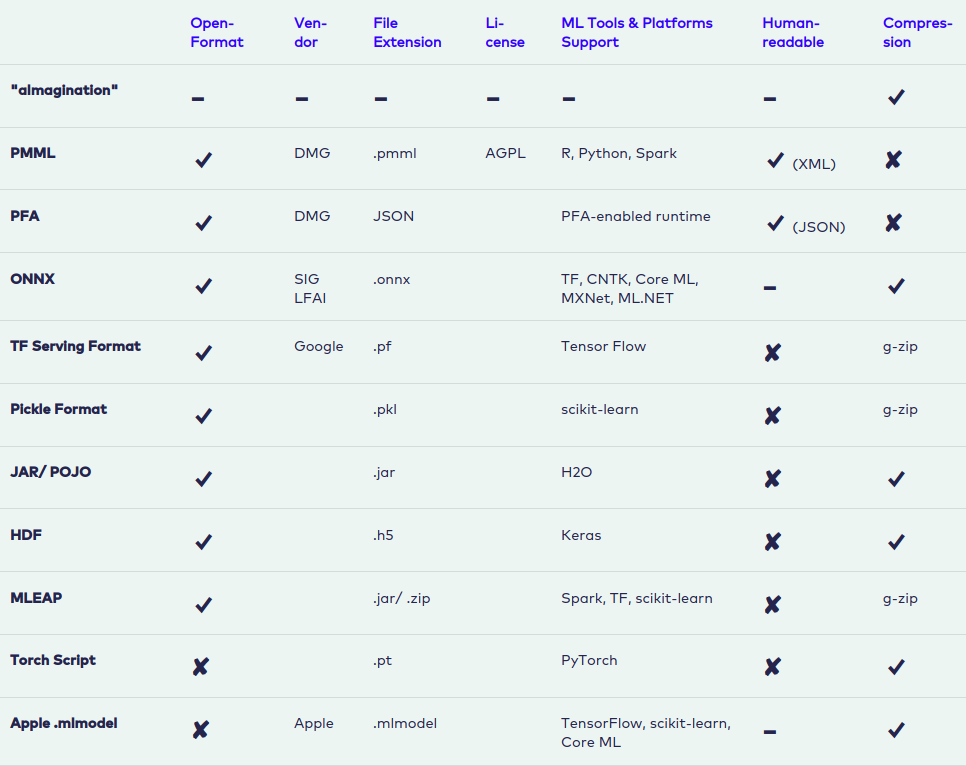